In [1]:
from collections import namedtuple
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Reaing data from the CSV file using Pandas
data = pd.read_csv("WeatherData.csv")

#Preview first 5 lines of data
data.head(5)

,date,temperatureMin,temperatureMax,humidity,dewPoint,windSpeed,temperatureMean
0,2018/01/01,58.78,83.07,0.67,57.63,3.36,70.5929
1,2018/01/02,60.46,83.13,0.69,59.33,4.55,70.5929
2,2018/01/03,64.04,80.68,0.70,60.35,4.48,70.5929
3,2018/01/04,60.63,80.30,0.71,58.65,5.91,70.5929
4,2018/01/05,56.63,79.61,0.65,54.36,4.81,70.5929


In [3]:
#Setting up the Pandas DataFrame with 'date' as the index
features = ["date", "temperatureMin", "temperatureMax", "humidity", "dewPoint", "windSpeed", "temperatureMean"]
df = pd.DataFrame(data, columns=features).set_index('date')

In [4]:
#Making a sub DataFrame set with weather data prior to 3 days for the features min and max temperature. 
#For now we make a temporary data set with 10 records for min and max temperature
tmp = df[['temperatureMin', 'temperatureMax', "temperatureMean"]].head(10)
tmp

,temperatureMin,temperatureMax,temperatureMean
date,,,
2018/01/01,58.78,83.07,70.5929
2018/01/02,60.46,83.13,70.5929
2018/01/03,64.04,80.68,70.5929
2018/01/04,60.63,80.30,70.5929
2018/01/05,56.63,79.61,70.5929
2018/01/06,56.11,79.59,70.5929
2018/01/07,55.52,79.53,70.5929
2018/01/08,54.91,78.51,70.5929
2018/01/09,57.02,79.73,70.5929


In [5]:
# We find the min temperature 1 day prior to current date and make this a new column
N = 1
feature = 'temperatureMin'
rows = tmp.shape[0]

# Mark the previous day temperature for the 1st record as 'None'
nth_prior_measurements = [None]*N + [tmp[feature][i-N] for i in range(N, rows)]

# make a new column name of feature_N and add to DataFrame
col_name = "{}_{}".format(feature, N)
tmp[col_name] = nth_prior_measurements
tmp

,temperatureMin,temperatureMax,temperatureMean,temperatureMin_1
date,,,,
2018/01/01,58.78,83.07,70.5929,NaN
2018/01/02,60.46,83.13,70.5929,58.78
2018/01/03,64.04,80.68,70.5929,60.46
2018/01/04,60.63,80.30,70.5929,64.04
2018/01/05,56.63,79.61,70.5929,60.63
2018/01/06,56.11,79.59,70.5929,56.63
2018/01/07,55.52,79.53,70.5929,56.11
2018/01/08,54.91,78.51,70.5929,55.52
2018/01/09,57.02,79.73,70.5929,54.91


In [6]:
# Creating a function to perform the above operations on the entire Data Set
def derive_nth_day_feature(df, feature, N):
    rows = df.shape[0]
    nth_prior_measurements = [None]*N + [df[feature][i-N] for i in range(N, rows)]
    col_name = "{}_{}".format(feature, N)
    df[col_name] = nth_prior_measurements

In [7]:
# Calling the function on all the features in the Data Set upto 3 days prior
for feature in features:
    if feature != 'date':
        for N in range(1, 4):
            derive_nth_day_feature(df, feature, N)

In [8]:
# Checking if all the columns have been added for all the features from the Data Set
df.columns

Index(['temperatureMin', 'temperatureMax', 'humidity', 'dewPoint', 'windSpeed',
       'temperatureMean', 'temperatureMin_1', 'temperatureMin_2',
       'temperatureMin_3', 'temperatureMax_1', 'temperatureMax_2',
       'temperatureMax_3', 'humidity_1', 'humidity_2', 'humidity_3',
       'dewPoint_1', 'dewPoint_2', 'dewPoint_3', 'windSpeed_1', 'windSpeed_2',
       'windSpeed_3', 'temperatureMean_1', 'temperatureMean_2',
       'temperatureMean_3'],
      dtype='object')

In [9]:
# We now perform data cleaning where we remove all the records we do not need. 
# Because we want to predict the weather we remove all the features that are not min, max temperatures 
# we also keep all the new derived variables we added in the last sections.
to_remove = [feature 
             for feature in features 
             if feature not in ['temperatureMin', 'temperatureMax', 'temperatureMean']]

# make a list of columns to keep
to_keep = [col for col in df.columns if col not in to_remove]

# select only the columns in to_keep and assign to df
df = df[to_keep]
df.columns

Index(['temperatureMin', 'temperatureMax', 'temperatureMean',
       'temperatureMin_1', 'temperatureMin_2', 'temperatureMin_3',
       'temperatureMax_1', 'temperatureMax_2', 'temperatureMax_3',
       'humidity_1', 'humidity_2', 'humidity_3', 'dewPoint_1', 'dewPoint_2',
       'dewPoint_3', 'windSpeed_1', 'windSpeed_2', 'windSpeed_3',
       'temperatureMean_1', 'temperatureMean_2', 'temperatureMean_3'],
      dtype='object')

In [10]:
# Checking the information of the DataFrame we created
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1826 entries, 2018/01/01 to 2022/12/31
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperatureMin     1826 non-null   float64
 1   temperatureMax     1826 non-null   float64
 2   temperatureMean    1826 non-null   float64
 3   temperatureMin_1   1825 non-null   float64
 4   temperatureMin_2   1824 non-null   float64
 5   temperatureMin_3   1823 non-null   float64
 6   temperatureMax_1   1825 non-null   float64
 7   temperatureMax_2   1824 non-null   float64
 8   temperatureMax_3   1823 non-null   float64
 9   humidity_1         1825 non-null   float64
 10  humidity_2         1824 non-null   float64
 11  humidity_3         1823 non-null   float64
 12  dewPoint_1         1825 non-null   float64
 13  dewPoint_2         1824 non-null   float64
 14  dewPoint_3         1823 non-null   float64
 15  windSpeed_1        1825 non-null   float64
 16  windSpeed_2   

In [11]:
# We take a look at some summary stats of the features and use the statistical rule of thumb to check for the existence of extreme outliers.
# We will use the describe() method of DataFrame to do this.
# The rule of thumb to identifying an extreme outlier is a value that is less than 3 interquartile ranges below the 25th percentile
# 3 interquartile ranges above the 75th percentile. 
# Interquartile range is simply the difference between the 75th percentile and the 25th percentile.

# We will call describe on df and transpose it due to the large number of columns
spread = df.describe().T

# precalculating interquartile range for ease of use in next calculation
IQR = spread['75%'] - spread['25%']

# create an outliers column which is either 3 IQRs below the first quartile or
# 3 IQRs above the third quartile
spread['outliers'] = (spread['min']<(spread['25%']-(3*IQR)))|(spread['max'] > (spread['75%']+3*IQR))

# Displaying the features containing just the extreme outliers
spread.loc[spread.outliers,]

,count,mean,std,min,25%,50%,75%,max,outliers
dewPoint_1,1825.0,62.300378,6.146404,32.88,58.6600,64.52,67.0400,72.58,True
dewPoint_2,1824.0,62.302708,6.147283,32.88,58.6675,64.53,67.0400,72.58,True
dewPoint_3,1823.0,62.304981,6.148204,32.88,58.6800,64.54,67.0400,72.58,True
windSpeed_1,1825.0,7.459671,3.012461,2.92,5.0800,6.57,9.0700,22.10,True
windSpeed_2,1824.0,7.461146,3.012628,2.92,5.0800,6.57,9.0725,22.10,True
windSpeed_3,1823.0,7.462622,3.012794,2.92,5.0800,6.57,9.0750,22.10,True


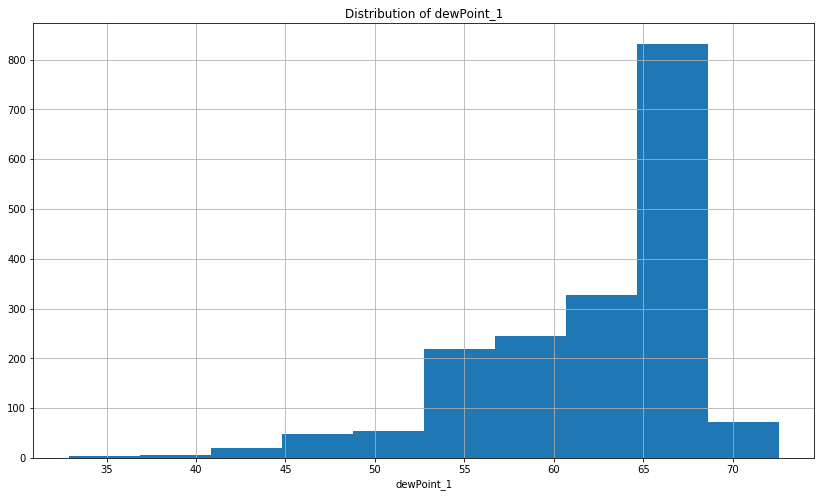

In [12]:
# Using graph to check the skew of the feature dewPoint_1
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]
df.dewPoint_1.hist()
plt.title('Distribution of dewPoint_1')
plt.xlabel('dewPoint_1')
plt.show()

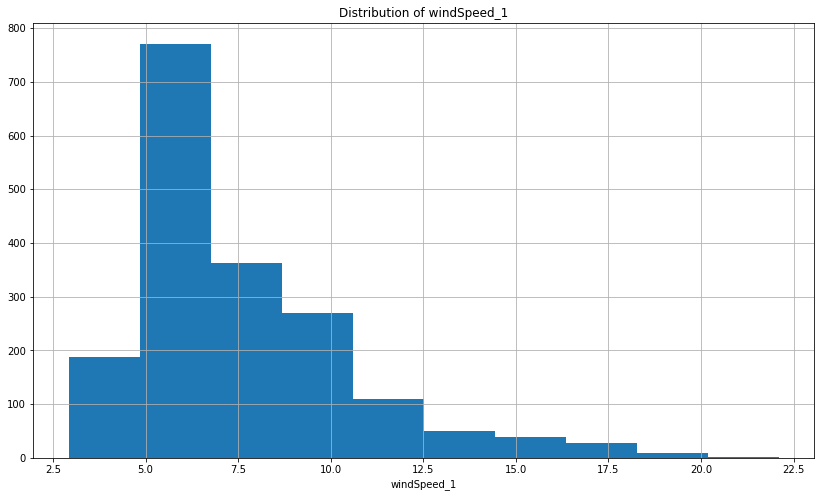

In [13]:
# Using graph to check the skew of feature windSpeed_1
df.windSpeed_1.hist()
plt.title('Distribution of windSpeed_1')
plt.xlabel('windSpeed_1')
plt.show()

In [14]:
# Drop all the values that are Null as we won't need them
df = df.dropna()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1823 entries, 2018/01/04 to 2022/12/31
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperatureMin     1823 non-null   float64
 1   temperatureMax     1823 non-null   float64
 2   temperatureMean    1823 non-null   float64
 3   temperatureMin_1   1823 non-null   float64
 4   temperatureMin_2   1823 non-null   float64
 5   temperatureMin_3   1823 non-null   float64
 6   temperatureMax_1   1823 non-null   float64
 7   temperatureMax_2   1823 non-null   float64
 8   temperatureMax_3   1823 non-null   float64
 9   humidity_1         1823 non-null   float64
 10  humidity_2         1823 non-null   float64
 11  humidity_3         1823 non-null   float64
 12  dewPoint_1         1823 non-null   float64
 13  dewPoint_2         1823 non-null   float64
 14  dewPoint_3         1823 non-null   float64
 15  windSpeed_1        1823 non-null   float64
 16  windSpeed_2   

In [16]:
# Now we move this entire clean data to a new CSV file
df.to_csv('WeatherFinalCleanData.csv')